# House Prices Exploration

In [97]:
# importing the requried libraries

import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [110]:
# loading the train dataset

df_train = pd.read_csv('data/train.csv')

In [111]:
# Checking the columns and features
df_train.shape

(1460, 81)

In [112]:
# Column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [113]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
# Type of data for each column
df_train.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [115]:
# See the distribution of our target variable, SalePrice
df_train['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

## Exploring continuous features

In [116]:
# Will focus on unique numerical features

continous_features = [features for features in df_train.columns 
                                  if (df_train[features].dtype == 'int64' or 
                                    df_train[features].dtype == 'float64')]
continous_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [174]:
# Removing unwanted numerical values from the list and features that are linked
removing = ['ScreenPorch', '3SsnPorch', 'GarageArea', 'GarageYrBlt', 'Fireplaces', 'HalfBath', 
                    'BsmtHalfBath', 'BsmtFullBath', 'LowQualFinSF', 'BsmtFinSF1',
                     'BsmtFinSF2', 'BsmtUnfSF', 'YearRemodAdd','MasVnrArea',
                       'OverallCond','MSSubClass', 'LotFrontage', 'Id', '2ndFlrSF',
                        'BedroomAbvGr', 'KitchenAbvGr', '1stFlrSF', 'WoodDeckSF',
                        'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal', 'TotRmsAbvGrd', 'FullBath']


[continous_features.remove(x) for x in continous_features if x in removing]
continous_features

['LotArea',
 'OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'MoSold',
 'YrSold',
 'SalePrice']

In [175]:
df_train_cont = df_train[continous_features]

In [176]:
df_train_cont.head()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,MoSold,YrSold,SalePrice
0,8450,7,2003,856,1710,2,2,2008,208500
1,9600,6,1976,1262,1262,2,5,2007,181500
2,11250,7,2001,920,1786,2,9,2008,223500
3,9550,7,1915,756,1717,3,2,2006,140000
4,14260,8,2000,1145,2198,3,12,2008,250000


In [177]:
df_train_cont.describe()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1971.267808,1057.429452,1515.463699,1.767123,6.321918,2007.815753,180921.195890
std,9981.264932,1.382997,30.202904,438.705324,525.480383,0.747315,2.703626,1.328095,79442.502883
min,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,1.000000,2006.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,795.750000,1129.500000,1.000000,5.000000,2007.000000,129975.000000
50%,9478.500000,6.000000,1973.000000,991.500000,1464.000000,2.000000,6.000000,2008.000000,163000.000000
75%,11601.500000,7.000000,2000.000000,1298.250000,1776.750000,2.000000,8.000000,2009.000000,214000.000000
max,215245.000000,10.000000,2010.000000,6110.000000,5642.000000,4.000000,12.000000,2010.000000,755000.000000


In [178]:
# Look at the correlation matrix
x = df_train_cont.corr()
x

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,MoSold,YrSold,SalePrice
LotArea,1.000000,0.105806,0.014228,0.260833,0.263116,0.154871,0.001205,-0.014261,0.263843
OverallQual,0.105806,1.000000,0.572323,0.537808,0.593007,0.600671,0.070815,-0.027347,0.790982
YearBuilt,0.014228,0.572323,1.000000,0.391452,0.199010,0.537850,0.012398,-0.013618,0.522897
TotalBsmtSF,0.260833,0.537808,0.391452,1.000000,0.454868,0.434585,0.013196,-0.014969,0.613581
GrLivArea,0.263116,0.593007,0.199010,0.454868,1.000000,0.467247,0.050240,-0.036526,0.708624
GarageCars,0.154871,0.600671,0.537850,0.434585,0.467247,1.000000,0.040522,-0.039117,0.640409
MoSold,0.001205,0.070815,0.012398,0.013196,0.050240,0.040522,1.000000,-0.145721,0.046432
YrSold,-0.014261,-0.027347,-0.013618,-0.014969,-0.036526,-0.039117,-0.145721,1.000000,-0.028923
SalePrice,0.263843,0.790982,0.522897,0.613581,0.708624,0.640409,0.046432,-0.028923,1.000000


In [202]:
# Created RoundedSalePrice feature, rounded the price to the closest $10,000 price.

df_train_cont['RoundedSalePrice'] = df_train_cont['SalePrice'] //10000

df_train_cont

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,MoSold,YrSold,SalePrice,RoundedSalePrice
0,8450,7,2003,856,1710,2,2,2008,208500,20
1,9600,6,1976,1262,1262,2,5,2007,181500,18
2,11250,7,2001,920,1786,2,9,2008,223500,22
3,9550,7,1915,756,1717,3,2,2006,140000,14
4,14260,8,2000,1145,2198,3,12,2008,250000,25
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,953,1647,2,8,2007,175000,17
1456,13175,6,1978,1542,2073,2,2,2010,210000,21
1457,9042,7,1941,1152,2340,1,5,2010,266500,26
1458,9717,5,1950,1078,1078,1,4,2010,142125,14


In [203]:
def describe_cont_feature(feature):
    print(f'\n** Results for {feature} ***')
    print(df_train_cont.groupby('RoundedSalePrice')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    greater_than_mean_price = df_train_cont[df_train_cont['RoundedSalePrice'] > 18][feature] 
    less_than_mean_price = df_train_cont[df_train_cont['RoundedSalePrice']  <=18][feature]
    tstat, pval = stats.ttest_ind(greater_than_mean_price, less_than_mean_price, equal_var=False)
    print('t-statistics: {: .1f}, p-value: {:.3}'.format(tstat, pval))

In [204]:
for feature in ['LotArea', 'OverallQual', 'YearBuilt','TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MoSold', 'YrSold']:
    describe_cont_feature(feature)
    



** Results for LotArea ***
                  count          mean           std      min       25%  \
RoundedSalePrice                                                         
3                   4.0   6951.000000   1818.301588   5000.0   5693.75   
4                   1.0   8500.000000           NaN   8500.0   8500.00   
5                   6.0   5734.666667   2218.684175   3636.0   4121.00   
6                  11.0   8177.363636   1645.288259   5720.0   6912.00   
7                  13.0   5806.461538   2469.279875   1491.0   5000.00   
8                  44.0   6963.386364   4085.858529   1477.0   3939.00   
9                  35.0   7564.800000   3671.053590   1533.0   5694.00   
10                 61.0   7813.147541   2376.028990   1680.0   6180.00   
11                 87.0   8249.758621   3866.436593   1680.0   6222.00   
12                103.0   8044.300971   2343.630328   1300.0   6898.50   
13                124.0   9161.516129   3383.966402   2522.0   7200.00   
14        

t-statistics:  22.8, p-value: 1.41e-95
None

** Results for TotalBsmtSF ***
                  count         mean         std     min      25%     50%  \
RoundedSalePrice                                                            
3                   4.0   450.000000  315.594677     0.0   360.00   540.0   
4                   1.0   649.000000         NaN   649.0   649.00   649.0   
5                   6.0   527.166667  333.896042     0.0   337.50   616.5   
6                  11.0   704.727273  291.005873   264.0   588.00   683.0   
7                  13.0   604.846154  211.827700     0.0   546.00   600.0   
8                  44.0   612.772727  327.141735     0.0   483.00   630.0   
9                  35.0   581.428571  375.255543     0.0   315.00   662.0   
10                 61.0   725.393443  327.009494     0.0   641.00   784.0   
11                 87.0   803.942529  288.862821     0.0   686.00   833.0   
12                103.0   887.262136  234.054793     0.0   765.00   876.0   


t-statistics:  25.2, p-value: 8.3e-113
None

** Results for MoSold ***
                  count      mean       std  min   25%  50%    75%   max
RoundedSalePrice                                                        
3                   4.0  6.750000  4.645787  1.0  4.00  7.5  10.25  11.0
4                   1.0  7.000000       NaN  7.0  7.00  7.0   7.00   7.0
5                   6.0  5.000000  2.449490  1.0  3.75  6.0   6.75   7.0
6                  11.0  6.181818  3.763461  1.0  3.50  6.0   8.50  12.0
7                  13.0  5.923077  2.361551  1.0  5.00  6.0   7.00  10.0
8                  44.0  6.022727  2.528798  1.0  4.75  6.0   7.00  12.0
9                  35.0  6.342857  2.969877  1.0  4.00  6.0   8.00  12.0
10                 61.0  6.311475  3.019608  1.0  4.00  6.0   8.00  12.0
11                 87.0  6.114943  2.621136  1.0  4.00  6.0   8.00  12.0
12                103.0  6.048544  2.698506  1.0  5.00  6.0   8.00  12.0
13                124.0  6.298387  2.610111  1.0  4.0

In [205]:
# Look at the average value of each feature based on whether OverallQual is missing
df_train_cont.groupby(df_train_cont['OverallQual'].isnull()).mean()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,MoSold,YrSold,SalePrice,RoundedSalePrice
OverallQual,,,,,,,,,,
False,10516.828082,6.099315,1971.267808,1057.429452,1515.463699,1.767123,6.321918,2007.815753,180921.19589,17.626712


## Plotting Continuous Features

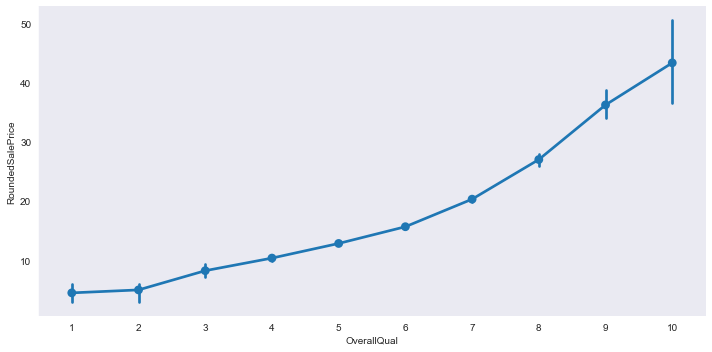

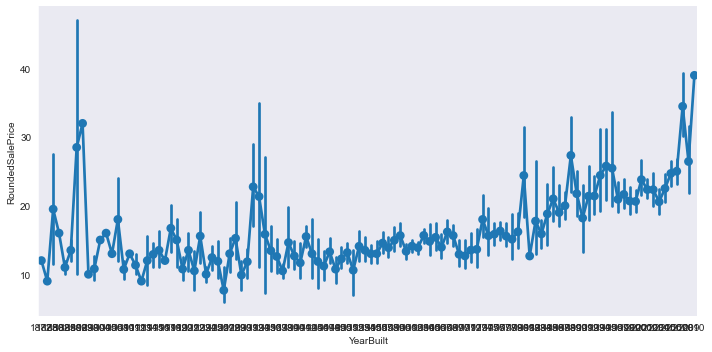

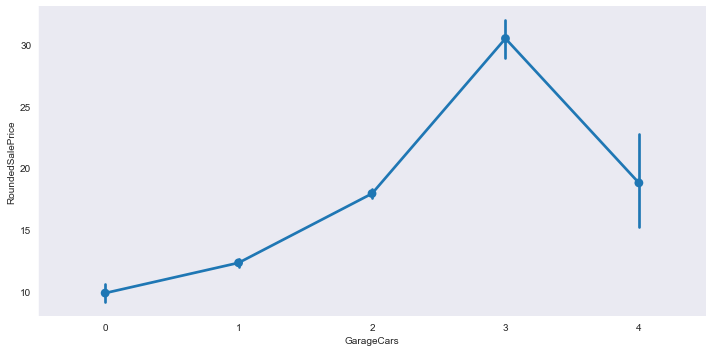

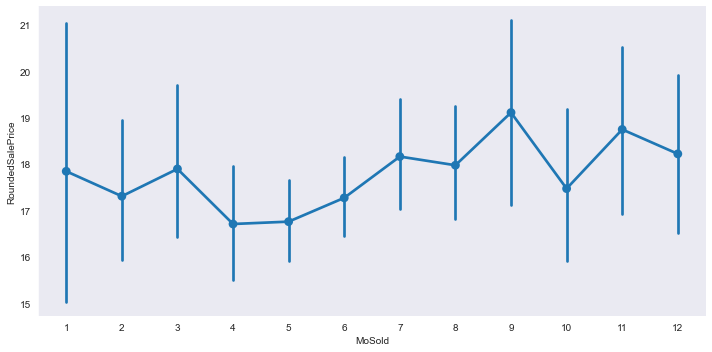

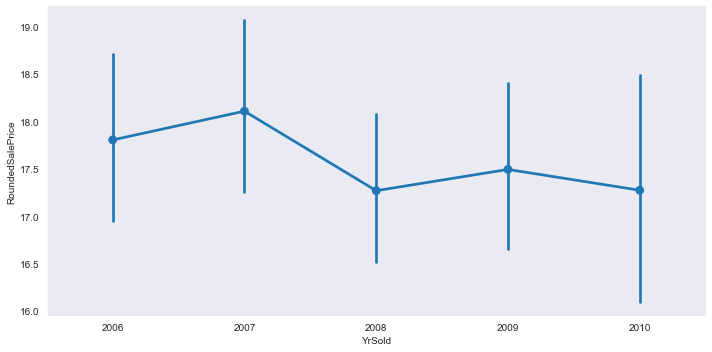

In [210]:
# Generate categorical plots for ordinal features

for col in ['OverallQual', 'YearBuilt', 'GarageCars', 'MoSold', 'YrSold']:
    sns.catplot(x = col, y='RoundedSalePrice', data=df_train_cont, kind='point', aspect=2, )

* Sale price increases as OverallQual increases 
* Year Built has slow growth relationship with SalePrice
* 3 GarageCars seems to be the cutting point, as price drops dramatically with GarageCars

## Exploring Categorical features

In [220]:
df_train.isnull().sum().sort_values().tail(20)

Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [230]:
# Exploring some of the high impact categorical features
categorical = ['SalePrice', 'MSSubClass', 'MSZoning', 'BldgType', 'OverallCond', 'Functional']

df_cat = df_train[categorical]
df_cat['RoundedSalePrice'] = df_train_cont['SalePrice'] //10000
df_cat

,SalePrice,MSSubClass,MSZoning,BldgType,OverallCond,Functional,RoundedSalePrice
0,208500,60,RL,1Fam,5,Typ,20
1,181500,20,RL,1Fam,8,Typ,18
2,223500,60,RL,1Fam,5,Typ,22
3,140000,70,RL,1Fam,5,Typ,14
4,250000,60,RL,1Fam,5,Typ,25
...,...,...,...,...,...,...,...
1455,175000,60,RL,1Fam,5,Typ,17
1456,210000,20,RL,1Fam,6,Min1,21
1457,266500,70,RL,1Fam,9,Typ,26
1458,142125,20,RL,1Fam,6,Typ,14


In [238]:
# Exploring the number of unique values for each feature
for col in df_cat.columns:
    print(f'{col}: {df_cat[col].nunique()}')

SalePrice: 663
MSSubClass: 15
MSZoning: 5
BldgType: 5
OverallCond: 9
Functional: 7
RoundedSalePrice: 54


In [252]:
#Check MSSubClass rate 
col_MSSubClass = df_cat.groupby('MSSubClass').mean()

In [253]:
col_MSSubClass.sort_values(by='RoundedSalePrice', ascending=False)

,SalePrice,OverallCond,RoundedSalePrice
MSSubClass,,,
60,239948.501672,5.297659,23.555184
120,200779.080460,5.045977,19.609195
75,192437.500000,6.250000,18.687500
20,185224.811567,5.550373,18.057836
80,169736.551724,5.896552,16.482759
70,166772.416667,6.633333,16.133333
40,156125.000000,6.500000,15.250000
85,147810.000000,6.100000,14.200000
50,143302.972222,6.013889,13.854167


In [261]:
df_cat.groupby(df_cat['MSSubClass'].isnull()).mean()

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
MSSubClass,,,,
False,180921.19589,56.89726,5.575342,17.626712


*         60	2-STORY 1946 & NEWER : The properties that cost the most on average
*       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER: Second on average sale price
*        30	1-STORY 1945 & OLDER: Lowest sale price
*       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER: Second lowest sale price

In [254]:
# Check price by MSZoning
col_MSZoning = df_cat.groupby('MSZoning').mean()
col_MSZoning.sort_values(by='RoundedSalePrice', ascending=False)

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
MSZoning,,,,
FV,214014.061538,90.461538,5.030769,20.923077
RL,191004.994787,49.374457,5.535187,18.636838
RH,131558.375000,80.312500,5.562500,12.750000
RM,126316.830275,84.931193,5.995413,12.155963
C (all),74528.000000,56.000000,4.600000,7.000000


In [262]:
df_cat.groupby(df_cat['MSZoning'].isnull()).mean()

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
MSZoning,,,,
False,180921.19589,56.89726,5.575342,17.626712


* A	Agriculture
* C	Commercial
* FV	Floating Village Residential
* I Industrial
* RH	Residential High Density
* RL	Residential Low Density
* RP	Residential Low Density Park 
* RM	Residential Medium Density

__Floating Village Residential has the highest SalePrice in average and Commerical has the lowest SalePrice__

In [255]:
# Check price by BldgType
col_BldgeType= df_cat.groupby('BldgType').mean()
col_BldgeType.sort_values(by='RoundedSalePrice', ascending=False)

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
BldgType,,,,
1Fam,185763.807377,41.565574,5.651639,18.109016
TwnhsE,181959.342105,133.157895,5.052632,17.728070
Twnhs,135911.627907,157.674419,5.465116,13.116279
Duplex,133541.076923,90.000000,4.923077,12.923077
2fmCon,128432.258065,184.516129,5.741935,12.419355


In [265]:
df_cat.groupby(df_cat['BldgType'].isnull()).mean()

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
BldgType,,,,
False,180921.19589,56.89726,5.575342,17.626712


BldgType: Type of dwelling
		
  * 1Fam	Single-family Detached	
  * 2FmCon	Two-family Conversion; originally built as one-family dwelling
  * Duplx	Duplex
  * TwnhsE	Townhouse End Unit
  * TwnhsI	Townhouse Inside Unit
  
  
  __Single-Family Detached houses sell for the highest on average and Two-Family Conversion sell for the lowest on average__

In [266]:
col_OverallCond = df_cat.groupby('OverallCond').mean()
col_OverallCond.sort_values(by='RoundedSalePrice', ascending=False)

,SalePrice,MSSubClass,RoundedSalePrice
OverallCond,,,
9,216004.545455,62.727273,21.181818
5,203146.914738,59.957369,19.867235
7,158145.487805,50.463415,15.312195
8,155651.736111,53.680556,15.013889
6,153961.591270,51.071429,14.920635
2,141986.400000,40.000000,13.600000
4,120438.438596,71.491228,11.578947
3,101929.400000,43.200000,9.760000
1,61000.000000,30.000000,6.000000


In [267]:
df_cat.groupby(df_cat['OverallCond'].isnull()).mean()

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
OverallCond,,,,
False,180921.19589,56.89726,5.575342,17.626712


OverallCond: Rates the overall condition of the house

* 10 Very Excellent
* 9	Excellent
* 8	Very Good
* 7	Good
* 6	Above Average	
* 5	Average
* 4	Below Average	
* 3	Fair
* 2	Poor
* 1	Very Poor

__As expected, highest rating of 9 has the highest average sale price and lowest rating of 1 has the lowest sale price. However, 5 (average) has the second highest sale price and 2 (poor) had 4th lowest sale price, that's out of order, other features might be having an impact on the price here.__

In [258]:
col_Functional = df_cat.groupby('Functional').mean()
col_Functional.sort_values(by='RoundedSalePrice', ascending=False)

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
Functional,,,,
Typ,183429.147059,57.058824,5.600000,17.872794
Mod,168393.333333,58.666667,5.000000,16.466667
Maj1,153948.142857,82.142857,4.571429,15.142857
Min1,146385.483871,45.806452,5.548387,14.193548
Min2,144240.647059,52.941176,5.529412,14.000000
Sev,129000.000000,60.000000,5.000000,12.000000
Maj2,85800.000000,32.000000,4.000000,8.200000


In [268]:
df_cat.groupby(df_cat['Functional'].isnull()).mean()

,SalePrice,MSSubClass,OverallCond,RoundedSalePrice
Functional,,,,
False,180921.19589,56.89726,5.575342,17.626712


__Typical functional yields highest sale price on average and major deductions 2 yields lowest sale price, as expected.__

In [269]:
df_cat.pivot_table('RoundedSalePrice', index=['OverallCond', 'MSZoning'], aggfunc=['count', 'mean'])

count             mean
                     RoundedSalePrice RoundedSalePrice
OverallCond MSZoning                                  
1           RL                      1         6.000000
2           C (all)                 1         8.000000
            RL                      2        23.000000
            RM                      2         7.000000
3           C (all)                 1         3.000000
            RH                      1         7.000000
            RL                     20        10.600000
            RM                      3         7.333333
4           C (all)                 3         6.000000
            RH                      2         9.000000
            RL                     35        13.171429
            RM                     17         9.588235
5           C (all)                 2         4.000000
            FV                     63        20.920635
            RH                      5        14.200000
            RL                    680        20.605882
            RM                     71        12.704225
6           C (all)                 2        11.500000
            FV                      2        21.000000
            RH                      5        11.600000
            RL                    198        15.878788
            RM                     45        10.955556
7           C (all)                 1        10.000000
            RH                      1        20.000000
            RL                    155        16.245161
            RM                     48        12.312500
8           RH                      2        15.000000
            RL                     47        16.553191
            RM                     23        11.869565
9           RL                     13        21.076923
            RM                      9        21.333333

__Residential Low Density (RL) and Residential Medium Density has the highest counts and featured in different price ranges and overall condition of property.__

In [270]:
df_cat.head()

,SalePrice,MSSubClass,MSZoning,BldgType,OverallCond,Functional,RoundedSalePrice
0,208500,60,RL,1Fam,5,Typ,20
1,181500,20,RL,1Fam,8,Typ,18
2,223500,60,RL,1Fam,5,Typ,22
3,140000,70,RL,1Fam,5,Typ,14
4,250000,60,RL,1Fam,5,Typ,25


In [271]:
df_cat.columns

Index(['SalePrice', 'MSSubClass', 'MSZoning', 'BldgType', 'OverallCond',
       'Functional', 'RoundedSalePrice'],
      dtype='object')

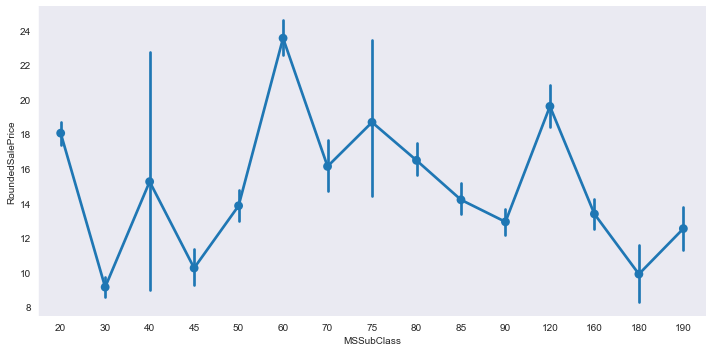

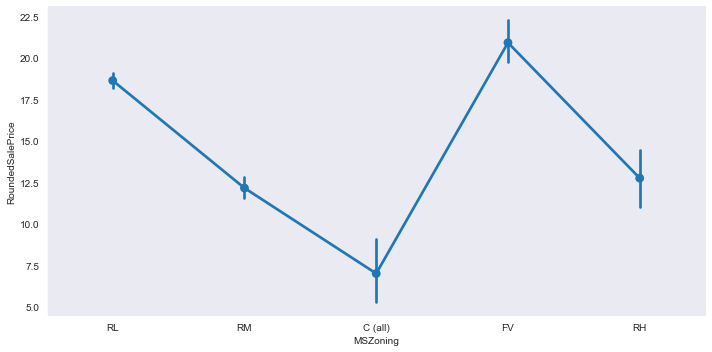

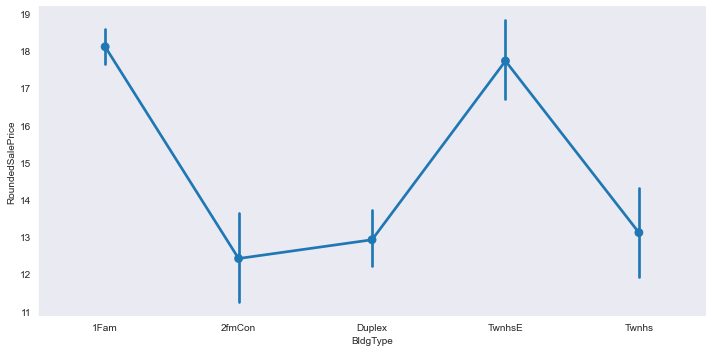

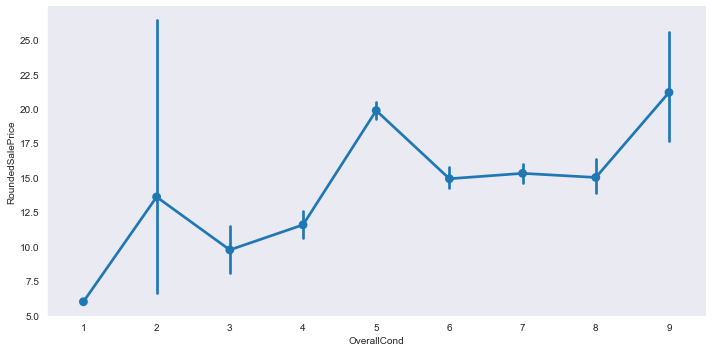

In [272]:
for col in ['MSSubClass', 'MSZoning', 'BldgType', 'OverallCond']:
    sns.catplot(x= col, y='RoundedSalePrice', data=df_cat, kind='point', aspect=2,)
    

__MSSubClass doesn't seem to have a strong correlation with SalePrice, as it's crossing with other classes within the column frequently. The other three features seem to have a strong correlation with sale price. Might be worth dropping MSSubClass as a result.__